# Image classification using the MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Data pre-processing

## 1.1: Extract & profile the data

In [2]:
#Use the 'fetch_openml' function from sklearn.datasets package to download the MNIST dataset from OpenML.

#Set 'as_frame=False' to return the data as NumPy arrays instead of a pandas DataFrame, as the dataset contains images.
mnist_dataset = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#Description of the MNIST dataset.
print(mnist_dataset.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
#Extract the data and target labels.
X, y = mnist_dataset['data'], mnist_dataset['target']

In [5]:
#There are 70,000 images in the dataset, and each image has 784 features.
#The reason for 784 features is that there is 28x28 pixels per image.
X.shape

(70000, 784)

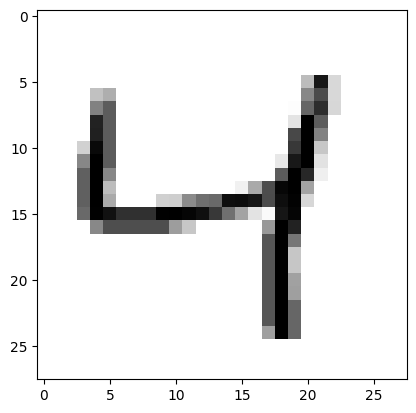

'4'

In [6]:
#Reshaping an instance's feature vector to a 28x28 array, and displaying this using matplotlib's 'imshow()' function.
def plot_number(img_data):
  number = img_data.reshape(28, 28)
  plt.imshow(number, cmap="binary")

#Displaying the third instance from the MNIST dataset.
digit = X[2]
plot_number(digit)
plt.show()

#Displaying the label of third instance from the MNIST dataset.
y[2]

## 1.2: Data splitting

In [7]:
#Split the data into a training set (80%) and a test set (20%).

#Set a random state for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1.3: Feature scaling

In [8]:
#Create a 'StandardScaler' instance.
scaler = StandardScaler()

#Fitting and transforming data using the scaler.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Model

## 2.1. Logistic Regression

In [9]:
#Note: This cell will take around 5mins to run.

#Create and train a Logistic Regression model.
lr = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto', n_jobs=-1)
lr.fit(X_train, y_train)

#Predict the labels for the test set.
y_prediction_lr = lr.predict(X_test)

#Evaluate the model.
print(f"Accuracy(%): {accuracy_score(y_test, y_prediction_lr)}\n")

print(f"Classification Report:\n\n {classification_report(y_test, y_prediction_lr)}")

Accuracy(%): 0.9164285714285715

Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



## 2.2. Support Vector Machines

In [ ]:
#Note: This cell will take around 10mins to run.

#Create and train a Support Vector Machine model.
svm = SVC(kernel='rbf', gamma='scale', C=1, decision_function_shape='ovr')
svm.fit(X_train, y_train)

#Predict the labels for the test set.
y_prediction_svm = svm.predict(X_test)

#Evaluate the model.
print(f"Accuracy(%): {accuracy_score(y_test, y_prediction_svm)}\n")

print(f"Classification Report:\n\n {classification_report(y_test, y_prediction_svm)}")

Accuracy(%): 0.963

Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



## 2.3. Random Forest

In [ ]:
#Note: This cell will take around 5mins to run.

#Create and train a Random Forest model.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#Predict the labels for the test set.
y_prediction_rf = rf.predict(X_test)

#Evaluate the model.
print(f"Accuracy(%): {accuracy_score(y_test, y_prediction_rf)}\n")

print(f"Classification Report:\n\n {classification_report(y_test, y_prediction_rf)}")

Accuracy(%): 0.9674285714285714

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# 3. Results

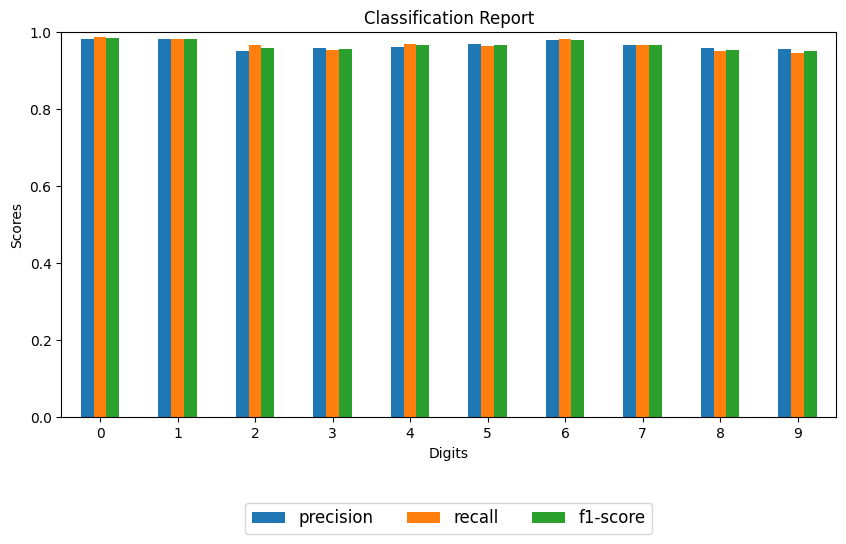

In [ ]:
def classification_report_func(y_truelabel, y_predictionlabel):

    report = classification_report(y_truelabel, y_predictionlabel, output_dict=True)

    df_report = pd.DataFrame(report).transpose()
    df_report.drop(['accuracy','macro avg','weighted avg'], axis=0, inplace=True)
    df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 5))
    plt.title('Classification Report')
    plt.xlabel('Digits')
    plt.ylabel('Scores')
    plt.ylim([0, 1.0])
    plt.xticks(rotation=0)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12)
    plt.show()


classification_report_func(y_test, y_prediction_rf)

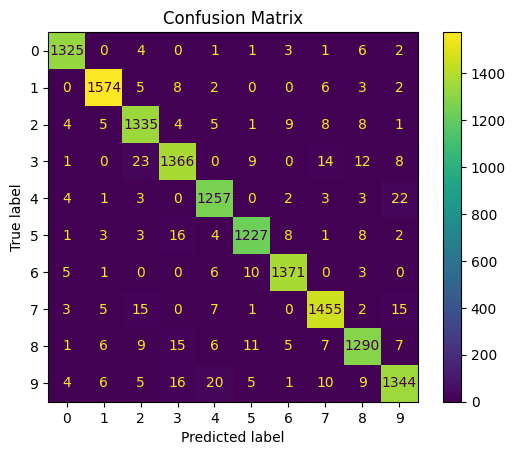

In [ ]:
def confusion_matrix_func(y_truelabel, y_predictionlabel, class_names):
    cm = confusion_matrix(y_truelabel, y_predictionlabel)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    display.plot()
    plt.title('Confusion Matrix')
    plt.show()

confusion_matrix_func(y_test, y_prediction_rf, class_names=[str(i) for i in range(10)])


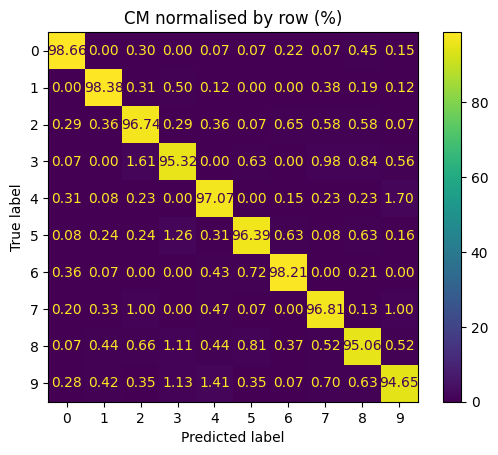

In [ ]:
def confusion_matrix_func(y_truelabel, y_predictionlabel, class_names):
    cm = confusion_matrix(y_truelabel, y_predictionlabel)
    cm_normalised = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    cm_percentage = cm_normalised * 100
    display = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=class_names)
    display.plot(values_format='.2f')
    plt.title('CM normalised by row (%)')
    plt.show()

confusion_matrix_func(y_test, y_prediction_rf, class_names=[str(i) for i in range(10)])


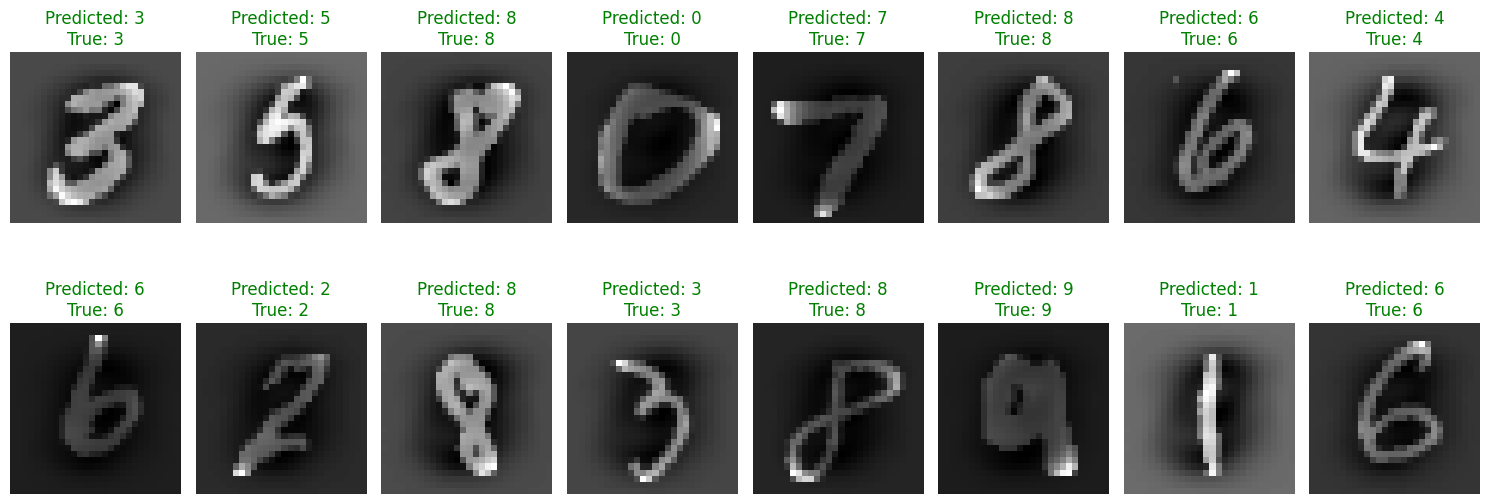

In [ ]:
def plot_predictions(X, y_truelabel, y_predictionlabel, num_samples=16):

    indices = np.random.choice(len(X), num_samples, replace=False)
    plt.figure(figsize=(15, 6))

    for i, index in enumerate(indices):
        image = X[index].reshape(28, 28)
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Predicted: {y_predictionlabel[index]}\nTrue: {y_truelabel[index]}",
                  color=("green" if y_predictionlabel[index] == y_truelabel[index] else "red"))
        plt.axis('off')

    plt.tight_layout()
    plt.show()


plot_predictions(X_test, y_test, y_prediction_rf, num_samples=16)

# References

Aurélien Géron (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. ‘O’Reilly Media, Inc.’

Howard, J. and Sylvain Gugger (2020). Deep learning for coders with fastai and PyTorch : AI applications without a PhD. Sebastopol, Ca: O’reilly Media.

‌McKinney, W. (2022). Python for Data Analysis. ‘O’Reilly Media, Inc.’

‌